In [14]:
import pandas as pd
import numpy as np

In [2]:
attend = pd.read_csv('../data/DIM_ATTENDANCE.csv')
disct = pd.read_csv('../data/DIM_DISCOUNT.csv')
tender = pd.read_csv('../data/DIM_TENDER_MEDIA.csv')

In [2]:
menu = pd.read_csv('../data/DIM_MENU_ITEM.csv')

In [3]:
attend.head(3)

NameError: name 'attend' is not defined

In [ ]:
disct.head(3)

In [3]:
menu.tail(10)

,menuItemID,organizationID,locationID,SiteID,POS_SystemID,menuItemMasterID,menuItemReportID,menuItemName1,majorGroupID,majorGroupMasterID,...,masterAlias,align,xbrCategory,customerInfoType,myInvUpdateFlag,lastUpdateDatetime,lastUsedDatetime,doNotReport,familyGroupNameMaster,majorGroupNameMaster
12053,7838500,10001,3000,6,93,6288346,6288346,1/2 DOM DRAFT,6281768,6268342,...,0,0,NaN,NaN,1,8/28/2017 17:02,NaN,NaN,DOM DRAFT BEER,BEER
12054,7838501,10001,3000,6,93,6288348,6288348,1/2 PREM DRAFT,6281768,6268342,...,0,0,NaN,NaN,1,8/28/2017 17:02,NaN,NaN,DOM DRAFT BEER,BEER
12055,7838550,10001,3000,6,93,6288166,6288166,1/2 DOM CAN,6281768,6268342,...,0,0,NaN,NaN,1,8/28/2017 17:10,NaN,NaN,DOM CAN BEER,BEER
12056,7838551,10001,3000,6,93,6290030,6290030,1/2 PREM CAN,6281768,6268342,...,0,0,NaN,NaN,1,8/28/2017 17:10,NaN,NaN,DOM CAN BEER,BEER
12057,7838552,10001,3000,6,93,6294138,6294138,1/2 WATER,6281758,6268334,...,0,0,NaN,NaN,1,8/28/2017 17:00,NaN,NaN,NA BTL WATER,NA BEVERAGE
12058,7838601,10001,3000,6,93,7838600,7838600,1/2 TOP SHELF,6281766,6268338,...,0,0,NaN,NaN,1,8/28/2017 17:00,NaN,NaN,VODKA,LIQUOR
12059,7838651,10001,3000,6,93,7838650,7838650,1/2 WELL,6281766,6268338,...,0,0,NaN,NaN,1,8/28/2017 17:00,NaN,NaN,VODKA,LIQUOR
12060,7838653,10001,3000,6,93,7838652,7838652,1/2 DOUBLE,6281766,6268338,...,0,0,NaN,NaN,1,8/28/2017 17:02,NaN,NaN,VODKA,LIQUOR
12061,7838654,10001,3000,6,93,6292212,6292212,1/2 WINE,6281767,6268340,...,0,0,NaN,NaN,1,8/28/2017 17:02,NaN,NaN,GLS MERLOT,WINE
12062,7864900,10001,3000,6,93,6300580,6300580,BEEF LO MEIN,6281773,6273090,...,0,0,NaN,NaN,1,9/25/2017 13:58,NaN,NaN,APPETIZER,PREMIUM FOOD


In [4]:
menu.rename(columns={'menuItemID': 'recordID'}, inplace=True)
menu.head()

,recordID,organizationID,locationID,SiteID,POS_SystemID,menuItemMasterID,menuItemReportID,menuItemName1,majorGroupID,majorGroupMasterID,...,masterAlias,align,xbrCategory,customerInfoType,myInvUpdateFlag,lastUpdateDatetime,lastUsedDatetime,doNotReport,familyGroupNameMaster,majorGroupNameMaster
0,8122034,200,1,15,16,8122033,8122033,Gluten Free Juic,811998,811998,...,0,0,NaN,NaN,1/1/1900 0:00,11/13/2015 10:30,NaN,NaN,NaN,NaN
1,7841299,200,1,15,16,7841298,7841298,Buff Chix Stk,811996,811996,...,0,0,NaN,NaN,1/1/1900 0:00,9/27/2012 18:10,NaN,NaN,NaN,NaN
2,7726145,200,1,15,16,7726144,7726144,Whole Fruit,811996,811996,...,0,0,NaN,NaN,1/1/1900 0:00,3/19/2015 14:21,NaN,NaN,NaN,NaN
3,7403682,200,1,15,16,7403681,7403681,Coffee Cake,811996,811996,...,0,0,NaN,NaN,1/1/1900 0:00,7/29/2015 9:46,NaN,NaN,NaN,NaN
4,5351336,200,1,15,16,5351335,5351335,Dog 90Min IPA,812002,812002,...,0,0,NaN,NaN,1/1/1900 0:00,8/25/2011 10:49,NaN,NaN,NaN,NaN


In [7]:
tender.head(3)

NameError: name 'tender' is not defined

** FACT SITES **

In [191]:
fact = pd.read_csv('../data/FACT_Sites_2017.csv', parse_dates=True,
                   na_values='NULL', chunksize=100000, iterator=True,
                       
                      usecols=['guestCheckLineItemID', 'Site', 'revenueCenterID',
                               'Location', 'orderTypeID', 'fixedPeriod',
                               'guestCheckID', 'posTransRef', 'serviceRoundNum',
                               'lineNum', 'seatNum', 'detailType', 'detailDesc',
                               'recordID', 'posRef', 'priceLevel', 'uwsID',
                               'workstation', 'checkEmployeeID', 
                               'managerEmployeeID', 'voidFlag', 'reasonCode',
                               'lineCount', 'lineTotal', 'lineTotal2',
                               'reportLineCount', 'reportLineTotal'])

In [17]:
#df = pd.concat(fact, ignore_index=True)
df = fact.get_chunk()
df[df.detailType == 1]

,guestCheckLineItemID,Site,revenueCenterID,Location,orderTypeID,fixedPeriod,guestCheckID,posTransRef,serviceRoundNum,lineNum,...,workstation,checkEmployeeID,managerEmployeeID,voidFlag,reasonCode,lineCount,lineTotal,lineTotal2,reportLineCount,reportLineTotal
1100000,131202343,Site1,811891,203 PHILLY FAVS,146867,87,22747636,169,1,21,...,203_3,815463,NaN,0,0,2,12.0,0.0,0,12.0
1100003,121091304,Site1,811865,117 PHILLY FAVS,146867,52,21980394,1250,1,22,...,117_1,815445,NaN,0,0,1,8.0,0.0,0,8.0
1100004,120898089,Site1,18878507,626 GRILL PORT,146867,61,22031395,7109,1,21,...,626_3,18883043,NaN,0,0,1,6.0,0.0,0,6.0
1100005,121015834,Site1,811852,101 PENN PIZZA,146867,60,22025704,242,1,23,...,101_1,830853,NaN,0,0,1,5.0,0.0,0,5.0
1100006,121014136,Site1,811852,101 PENN PIZZA,146867,57,22004508,7121,1,21,...,101_1,830853,NaN,0,0,1,8.0,0.0,0,8.0
1100007,121390702,Site1,18878507,626 GRILL PORT,146867,52,21977347,242,1,24,...,626_3,18883043,NaN,0,0,1,5.0,0.0,0,5.0
1100008,121394021,Site1,18878507,626 GRILL PORT,146867,62,22054929,242,1,21,...,626_3,18883043,NaN,0,0,1,5.0,0.0,0,5.0
1100009,121198564,Site1,811890,201 LIBERTY GRLL,146867,58,22014410,1268,1,22,...,201_5,815452,NaN,0,0,1,10.0,0.0,0,10.0
1100010,120010976,Site1,18878507,626 GRILL PORT,146867,50,21966468,7109,1,22,...,626_3,18883043,NaN,0,0,1,6.0,0.0,0,6.0
1100011,119893381,Site1,18878507,626 GRILL PORT,146867,48,21957099,7109,1,21,...,626_3,18883043,NaN,0,0,1,6.0,0.0,0,6.0


In [23]:
menu[menu.menuItemID == 131202343]

,menuItemID,organizationID,locationID,SiteID,POS_SystemID,menuItemMasterID,menuItemReportID,menuItemName1,majorGroupID,majorGroupMasterID,...,masterAlias,align,xbrCategory,customerInfoType,myInvUpdateFlag,lastUpdateDatetime,lastUsedDatetime,doNotReport,familyGroupNameMaster,majorGroupNameMaster


In [7]:
df[df.managerEmployeeID.notnull()].groupby('managerEmployeeID').size().head()

managerEmployeeID
817027.0    30
821532.0    73
826197.0     2
826397.0     1
842618.0     1
dtype: int64

In [8]:
df.Location.value_counts().head()

129 LIBERTY GRLL    3948
102 CHCKIE PETES    3368
121 LIBERTY GRLL    2573
138 LIBERTY GRLL    2565
119 CHCKIE PETES    2458
Name: Location, dtype: int64

In [13]:
df[df.Location == 'NOT IN USE'].head()

,guestCheckLineItemID,Site,revenueCenterID,Location,orderTypeID,fixedPeriod,guestCheckID,posTransRef,serviceRoundNum,lineNum,...,workstation,checkEmployeeID,managerEmployeeID,voidFlag,reasonCode,lineCount,lineTotal,lineTotal2,reportLineCount,reportLineTotal
1214,119067123,Site1,18422354,NOT IN USE,146867,83,21897076,7859,1,21,...,428_1,20758802,NaN,0,0,1,10.0,0.0,0,10.0
1533,119065989,Site1,18422354,NOT IN USE,146867,78,21856981,3405,1,22,...,428_1,20758802,NaN,0,0,1,9.0,0.0,0,9.0
1639,119065703,Site1,18422354,NOT IN USE,146867,76,21851183,3604,1,21,...,428_1,20758802,NaN,0,0,1,9.0,0.0,0,9.0
2777,119066559,Site1,18422354,NOT IN USE,146867,81,21865296,1250,1,23,...,428_1,20758802,NaN,0,0,1,8.0,0.0,0,8.0
2893,119065515,Site1,18422354,NOT IN USE,146867,75,21846868,3339,1,22,...,428_1,20758802,NaN,0,0,1,10.0,0.0,0,10.0


In [14]:
df.recordID.head()

0      813258
1      812892
2      812892
3    18879051
4    19606611
Name: recordID, dtype: int64

In [15]:
df.groupby(['Location', 'revenueCenterID','uwsID']).size()

Location          revenueCenterID  uwsID   
101 PENN PIZZA    811852           812067      259
                                   812069      519
                                   812070      277
                                   812071      440
                                   812072      229
                                   812075      238
102 AB PORT       18422348         18422359    119
102 CHCKIE PETES  811853           812076      642
                                   812077      534
                                   812078      508
                                   812081      727
                                   812082      401
                                   812083      556
103 Miller Port   18422350         812234      110
104 PHILLY FAVS   811854           812084      178
                                   812087      331
                                   812088      427
                                   812089      383
                                   812

In [10]:
def generateDf(df):
    masterMenuList = list()

    for chunk in df:
        menuFaqChunk = chunk.merge(menu)
        basketList = menuFaqChunk.groupby('guestCheckID')['menuItemName1'].apply(list)
        for basket in basketList:
                masterMenuList.append(basket)
        return masterMenuList

In [11]:
generateDf(fact)

[['Chocolate Milk'],
 ['Snapple Tea', 'Souvenir Soda'],
 ['Bass Fresh Fries'],
 ['20oz Water'],
 ['20oz G2 LemonLim'],
 ['20oz Water'],
 ['Liq Tier 2 '],
 ['CP 3.25oz Cup'],
 ['Snapple Apple'],
 ['Liq Tier 2 '],
 ['Liq Tier 2 '],
 ['Liq Tier 2 '],
 ['Roll Cheesesteak'],
 ['Cup Smoothie'],
 ['Pretzel Braided'],
 ['Pretzel Braided'],
 ['Liq Tier 2 '],
 ['Pretzel Braided'],
 ['Pretzel Braided'],
 ['Bacon Mac Burger'],
 ['Bass Fresh Fries'],
 ['Liq Tier 2 '],
 ['Liq Tier 2 ', 'Wine Spark White', 'Small Soda', 'Wht Zin Split'],
 ['Liq Tier 2 ', 'Cup Smoothie'],
 ['Small Soda', 'Wine Spark Red'],
 ['20oz Water'],
 ['20oz Water'],
 ['20oz Water'],
 ['Small Soda'],
 ['Liq Tier 2 '],
 ['2lb Tender Fd Tr'],
 ['20oz Water'],
 ['Chard Split'],
 ['Hot Dog Eagles', 'Small Soda', 'Small Soda'],
 ['20oz Water', 'Liq Tier 2 ', 'Cup Frozen Drink'],
 ['Domestic Draft', 'Chard Split', 'Wine 187 Cab', 'Wine Spark Red'],
 ['Personal Pizza'],
 ['Domestic Draft'],
 ['Pretzel Braided'],
 ['Snapple Apple'],
 ['

In [175]:
def generateMarket(dfIter):
    masterMenuList = list()
    for chunk in dfIter:
        m_faqs = chunk.merge(menu)
        basketList = m_faqs.groupby('guestCheckID')['menuItemName1'].apply(list)
        for basket in basketList:
            masterMenuList.append(basket)
    return masterMenuList

In [176]:
def generateMarketChunks(df):
    masterMenuList = list()
    m_faqs = df.merge(menu)
    basketList = m_faqs.groupby('guestCheckID')['menuItemName1'].apply(list)
    for basket in basketList:
        masterMenuList.append(basket)
    return masterMenuList

In [70]:
df.Location.head()

0    C04 LIBERTY GRLL
1    C04 LIBERTY GRLL
2    C04 LIBERTY GRLL
3     123 PHILLY FAVS
4      120 PENN PIZZA
Name: Location, dtype: object

In [156]:
df[df.Location.str.startswith('C23')].head()

,guestCheckLineItemID,Site,revenueCenterID,Location,orderTypeID,fixedPeriod,guestCheckID,posTransRef,serviceRoundNum,lineNum,...,workstation,checkEmployeeID,managerEmployeeID,voidFlag,reasonCode,lineCount,lineTotal,lineTotal2,reportLineCount,reportLineTotal
127,132912257,Site1,811906,C23 LINCOLN GRLL,146867,66,22872010,102,1,21,...,323_5,821497,NaN,0,0,1,5.0,0.0,0,5.0
254,131950788,Site1,811906,C23 LINCOLN GRLL,146867,48,22805365,6993,1,24,...,323_6,821489,NaN,0,0,1,8.0,0.0,0,8.0
334,132341370,Site1,811906,C23 LINCOLN GRLL,146867,55,22832773,6999,1,21,...,323_5,821497,NaN,0,0,1,5.0,0.0,0,5.0
457,132572828,Site1,811906,C23 LINCOLN GRLL,146867,58,22848676,7914,1,23,...,323_6,821489,NaN,0,0,1,10.0,0.0,0,10.0
458,132155190,Site1,811906,C23 LINCOLN GRLL,146867,52,22820224,7914,1,21,...,323_6,821489,NaN,0,0,1,10.0,0.0,0,10.0


In [173]:
def generateLocFreqs(df):
    locFreqs = defaultdict(dict)
    for loc in df.Location.unique():
        locFreqs[loc] = apriori(generateMarketChunks(df[df.Location == loc]), 0.01)
        #print("Success")
    return locFreqs

In [59]:
def generateIndMarket(bigdf):
    masterLocs = dict()
    for chunk in bigdf:
        masterLocs.update(generateLocFreqs(chunk))
    return masterLocs

In [174]:
locfreqs = generateLocFreqs(df)

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 12
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 6
Freq

In [195]:
locFreqDict = generateIndMarket(fact)

Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequ

Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent

Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 77
Frequent itemsets of size 3 at support threshold 0.01 = 279
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent

Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent

Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 39
Frequent itemsets of size 2 at support threshold 0.01 = 467
Frequent itemsets of size 3 at support threshold 0.01 = 3164
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Freq

Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Freque

Frequent itemsets of size 3 at support threshold 0.01 = 3506
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 24
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent i

Frequent itemsets of size 3 at support threshold 0.01 = 2555
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent it

Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent ite

Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequen

Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 230
Frequent itemsets of size 3 at support threshold 0.01 = 1332
Freque

Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent 

Frequent itemsets of size 3 at support threshold 0.01 = 1358
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent it

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 27
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 15
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 54
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent items

Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 35
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 27
Frequent itemsets of size 3 at support threshold 0.01 = 33
Frequent itemsets of size 1 at support threshold 0.01 = 47
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 49
Frequent itemsets of size 3 at support threshold 0.01 = 111
Frequent itemsets of size 1 at support threshold 0.01 = 6

Frequent itemsets of size 3 at support threshold 0.01 = 17
Frequent itemsets of size 1 at support threshold 0.01 = 35
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 33
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 43
Frequent itemsets of size 3 at support threshold 0.01 = 24
Frequent itemsets of size 1 at support threshold 0.01 = 

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 45
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 56
Frequent itemsets of size 2 at support threshold 0.01 = 51
Frequent itemsets of size 3 at support threshold 0.01 = 82
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 25
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 54
Frequent itemsets of size 3 at support threshold 0.01 = 132
Frequent itemsets of size 1 at support threshold 0.01 = 46
Frequent itemsets of size 2 at support threshold 0.01 = 8


Frequent itemsets of size 3 at support threshold 0.01 = 106
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 16
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 77
Frequent itemsets of size 3 at support threshold 0.01 = 127
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 22
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 50
Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 =

Frequent itemsets of size 2 at support threshold 0.01 = 34
Frequent itemsets of size 3 at support threshold 0.01 = 22
Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 31
Frequent itemsets of size 3 at support threshold 0.01 = 33
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 58
Frequent itemsets of size 2 at support threshold 0.01 = 174
Frequent itemsets of size 3 at support threshold 0.01 = 335
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 45
Frequent itemsets of size 3 at support threshold 0.01 

Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 16
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 45
Frequent itemsets of size 3 at support threshold 0.01 = 43
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 29

Frequent itemsets of size 1 at support threshold 0.01 = 109
Frequent itemsets of size 2 at support threshold 0.01 = 416
Frequent itemsets of size 3 at support threshold 0.01 = 1056
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 34
Frequent itemsets of size 1 at support threshold 0.01 = 44
Frequent itemsets of size 2 at support threshold 0.01 = 156
Frequent itemsets of size 3 at support threshold 0.01 = 437
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 76
Frequent itemsets of size 3 at support threshold 0.01 = 109
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 45
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 48


Frequent itemsets of size 3 at support threshold 0.01 = 197
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 47
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 31
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 10

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 46
Frequent itemsets of size 3 at support threshold 0.01 = 53
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 71
Frequent itemsets of size 3 at support threshold 0.01 = 132
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 26
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 =

Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 62
Frequent itemsets of size 3 at support threshold 0.01 = 172
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 2
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 30
Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 1
Fre

Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 30
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 35
Frequent itemsets of size 3 at support threshold 0.01 = 60
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent i

Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 2
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent ite

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 63
Frequent itemsets of size 3 at support threshold 0.01 = 323
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 27
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 49
Frequent itemsets of size 2 at support threshold 0.01 = 82
Frequent itemsets of size 3 at support threshold 0.01 = 234
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 =

Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 56
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 42
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 11
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 41
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 39
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 48
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 10
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 46
Frequent itemsets of size 3 at support threshold 0.01 = 34
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 12
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 10
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 45
Frequent itemsets of size 3 at support threshold 0.01 = 57
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 50
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 53
Frequent itemsets of size 2 at support threshold 0.01 = 87
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 17
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 31
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 27
Frequent itemsets of size 3 at support threshold 0.01 = 28
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 30
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 31
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 12
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 44
Frequent itemsets of size 3 at support threshold 0.01 = 85
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 13
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 30
Frequent itemsets of size 3 at support threshold 0.01 = 39
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 30
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 37
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 24
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 25
Fre

Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 39
Frequent itemsets of size 3 at support threshold 0.01 = 16
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent 

Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 92
Frequent itemsets of size 2 at support threshold 0.01 = 100
Frequent itemsets of size 3 at support threshold 0.01 = 152
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
F

Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 69
Frequent itemsets of size 3 at support threshold 0.01 = 107
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 18

Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 37
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequen

Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent i

Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 44
Frequent itemsets of size 3 at support threshold 0.01 = 276
Frequent itemsets of size 1 at support threshold 0.01 = 25
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 27
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 39
Frequent itemsets of size 2 at support threshold 0.01 = 107
Frequent itemsets of size 3 at support threshold 0.01 = 269
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Fre

Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequen

Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 1
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent ite

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 47
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 43
Frequent itemsets of size 3 at support threshold 0.01 = 63
Frequent itemsets of size 1 at support threshold 0.01 = 46
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 9
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 22
Frequent itemsets of size 3 at support threshold 0.01 = 13
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 14
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 45
Frequent itemsets of size 3 at support threshold 0.01 = 39
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 38
Frequent itemsets of size 3 at support threshold 0.01 = 39
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 83
F

Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 33
Frequent itemsets of size 3 at support threshold 0.01 = 22
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 9
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 35
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 35
Frequent itemsets of size 2 at support threshold 0.01 = 33
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 49
Frequent itemsets of size 2 at support threshold 0.01 = 94
Frequent itemsets of size 3 at support threshold 0.01 = 146
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 39
Frequent itemsets of size 3 at support threshold 0.01 = 19
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 3


Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 1
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 52
Frequent itemsets of size 2 at support threshold 0.01 = 55
Frequent itemsets of size 3 at support threshold 0.01 = 44
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 19
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 67
Frequent itemsets of size 3 at support threshold 0.01 = 80
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 31
Frequent itemsets of size 3 at support threshold 0.01 = 44
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 7
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 44
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 14
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 6
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 3
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent it

Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 42
Frequent itemsets of size 3 at support threshold 0.01 = 85
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 41
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 45
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 13

Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 59
Frequent itemsets of size 3 at support threshold 0.01 = 123
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 9
Freq

Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 46
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 36
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 39
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequ

Frequent itemsets of size 2 at support threshold 0.01 = 274
Frequent itemsets of size 3 at support threshold 0.01 = 481
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 41
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 6
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 68
Frequent itemsets of size 3 at support threshold 0.01 = 64
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 54
Frequent itemsets of size 3 at support threshold 0.01 = 72
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 59
Frequent itemsets of size 3 at support threshold 0.01 = 103
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 47
Frequ

Frequent itemsets of size 1 at support threshold 0.01 = 49
Frequent itemsets of size 2 at support threshold 0.01 = 170
Frequent itemsets of size 3 at support threshold 0.01 = 276
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 39
F

Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 4
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 26
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequen

Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 37
Frequent itemsets of size 3 at support threshold 0.01 = 49
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 35
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 2
Fr

Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 6
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 3
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 42
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 16
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 35
Frequent itemsets of size 3 at support threshold 0.01 = 21
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 16


Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 61
Frequent itemsets of size 2 at support threshold 0.01 = 81
Frequent itemsets of size 3 at support threshold 0.01 = 157
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 14
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 3
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 36
Frequent itemsets of size 3 at support threshold 0.01 = 76
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 29
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 32
Frequent itemsets of size 2 at support threshold 0.01 = 24
Frequent itemsets of size 3 at support threshold 0.01 = 31
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 14

Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 11
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 25
Frequent itemsets of size 3 at support threshold 0.01 = 36
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 20
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 12
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 66
Frequent itemsets of size 3 at support threshold 0.01 = 139
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 48
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 7
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 19
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 17

Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 39
Frequent itemsets of size 3 at support threshold 0.01 = 28
Frequent itemsets of size 1 at support threshold 0.01 = 28
Frequent itemsets of size 2 at support threshold 0.01 = 23
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 21
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 28
Frequent itemsets of size 3 at support threshold 0.01 = 24
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 16
Fre

Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 6
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 3
Frequent itemsets of size 1 at support threshold 0.01 = 5
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent 

Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 34
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 16
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 16
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 6
Freque

Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 41
Frequent itemsets of size 3 at support threshold 0.01 = 42
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 5
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 113
Frequent itemsets of size 2 at support threshold 0.01 = 311
Frequent itemsets of size 3 at support threshold 0.01 = 641
Frequent itemsets of size 1 at support threshold 0.01 = 44
Frequent itemsets of size 2 at support threshold 0.01 = 44
Frequent itemsets of size 3 at support threshold 0.01 = 69
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 1

Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 6
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 30
Frequent itemsets of size 3 at support threshold 0.01 = 18
Frequent itemsets of size 1 at support threshold 0.01 = 10
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 13
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 15
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 40
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 15
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 11
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 18
Freq

Frequent itemsets of size 3 at support threshold 0.01 = 202
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 32
Frequent itemsets of size 3 at support threshold 0.01 = 21
Frequent itemsets of size 1 at support threshold 0.01 = 40
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 23
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 30
Frequent itemsets of size 2 at support threshold 0.01 = 10
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 49
Frequent itemsets of size 3 at support threshold 0.01 = 54
Frequent itemsets of size 1 at support threshold 0.01 = 1

Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 12
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 25
Frequent itemsets of size 2 at support threshold 0.01 = 66
Frequent itemsets of size 3 at support threshold 0.01 = 69
Frequent itemsets of size 1 at support threshold 0.01 = 21
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 15
Frequent itemsets of size 2 at support threshold 0.01 = 13
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 18
Frequent itemsets of size 3 at support threshold 0.01 = 9
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 45
F

Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 9
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 23
Frequent itemsets of size 2 at support threshold 0.01 = 20
Frequent itemsets of size 3 at support threshold 0.01 = 4
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent i

Frequent itemsets of size 1 at support threshold 0.01 = 29
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 13
Frequent itemsets of size 2 at support threshold 0.01 = 4
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 22
Frequent itemsets of size 2 at support threshold 0.01 = 17
Frequent itemsets of size 3 at support threshold 0.01 = 5
Frequent itemsets of size 1 at support threshold 0.01 = 19
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 8
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 12
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 0
Frequent items

Frequent itemsets of size 3 at support threshold 0.01 = 12
Frequent itemsets of size 1 at support threshold 0.01 = 14
Frequent itemsets of size 2 at support threshold 0.01 = 11
Frequent itemsets of size 3 at support threshold 0.01 = 8
Frequent itemsets of size 1 at support threshold 0.01 = 9
Frequent itemsets of size 2 at support threshold 0.01 = 2
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 40
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 31
Frequent itemsets of size 2 at support threshold 0.01 = 68
Frequent itemsets of size 3 at support threshold 0.01 = 404
Frequent itemsets of size 1 at support threshold 0.01 = 33
Frequent itemsets of size 2 at support threshold 0.01 = 26
Frequent itemsets of size 3 at support threshold 0.01 = 20
Frequent itemsets of size 1 at support threshold 0.01 = 32
Fr

Frequent itemsets of size 1 at support threshold 0.01 = 24
Frequent itemsets of size 2 at support threshold 0.01 = 54
Frequent itemsets of size 3 at support threshold 0.01 = 76
Frequent itemsets of size 1 at support threshold 0.01 = 27
Frequent itemsets of size 2 at support threshold 0.01 = 8
Frequent itemsets of size 3 at support threshold 0.01 = 2
Frequent itemsets of size 1 at support threshold 0.01 = 7
Frequent itemsets of size 2 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 17
Frequent itemsets of size 2 at support threshold 0.01 = 7
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 18
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent itemsets of size 1 at support threshold 0.01 = 3
Frequent itemsets of size 2 at support threshold 0.01 = 1
Frequent itemsets of size 3 at support threshold 0.01 = 0
Frequent

In [182]:
for locKey in locFreqDict:
    for freqKey in locKey:
        

{}

In [86]:
locfreqs.values()

dict_values([])

In [17]:
allBaskets = generateMarket(fact)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [18]:
allBaskets

[['DD Iced', 'Premium Draft', 'Tortilla Chp'],
 ["16oz Henry's"],
 ['CP 3.25oz Cup'],
 ['Pretzel Braided'],
 ['Bud Light Drft'],
 ['1L Water'],
 ['Liq Tier 2 '],
 ['Liq Tier 2 '],
 ['CP 3.25oz Cup'],
 ['CP 3.25oz Cup'],
 ['Angus Burger'],
 ['Snapple Apple'],
 ['Angus Burger'],
 ['Liq Tier 2 '],
 ['Liq Tier 2 '],
 ['Snapple Tea', 'Roll Cheesesteak'],
 ['CP 3.25oz Cup'],
 ['Small Soda'],
 ['Cup Yard', 'Cup Frozen Drink', 'Liq Tier 2 '],
 ['20oz Water', 'Pretzel Braided'],
 ['Pretzel Braided'],
 ['Sausage Italian', '20oz Water'],
 ['Pretzel Braided'],
 ['Small Soda'],
 ['CP Tender Tray', 'CP Fry Cup'],
 ['Bass Fresh Fries'],
 ['Liq Tier 2 '],
 ['Angus Burger', 'Hot Dog Eagles'],
 ['Coke Bottle'],
 ['CP Small Fry'],
 ['Cup Frozen Drink', 'Domestic Draft', 'Chard Split', 'Pretzel Braided'],
 ['Cup Yard', 'Domestic Draft'],
 ['20oz Water'],
 ['CP Fry Cup'],
 ['Wine 187 Cab',
  'Chard Split',
  'Pretzel Braided',
  'Pinot Grig Split',
  'Cup Smoothie'],
 ['20oz Water'],
 ['20oz Water'],
 ['CP

In [19]:
len(allBaskets)

3060324

In [22]:
from collections import Counter
from collections import defaultdict
import random

In [197]:
from itertools import combinations
def apriori(groceryBaskets, support=0.01):
    """Return a dictionary of itemsets that are frequent.
    
    Keys in the returned dictionary are itemsets; 
    values are corresponding support fractions.
    
    datastream: CSV file with market basket data
    support: threshold
    """
    freqItemsets = defaultdict(dict)
    i = 0
    while True:
        i += 1
        count = Counter()
        for basket in groceryBaskets:
            if i==1:
                items = basket
            else:
                items = [item for item in basket 
                         if tuple([item]) in freqItemsets[1]]
            for group in combinations(items, i):
                for subgroup in combinations(group, i-1):
                    if tuple(subgroup) not in freqItemsets[i-1]:
                        break
                # found a candidate group of items!
                count[tuple(list(group))] += 1
        for g in count:
            freq = count[g]/len(groceryBaskets)
            if freq >= support:
                freqItemsets[i][g] = freq
        #msg = "Frequent itemsets of size {0} at support threshold {1} = {2}"
        #print(msg.format(i, support, len(freqItemsets[i])))
        if len(freqItemsets[i]) == 0 or i == 3:
            break
    return freqItemsets


In [132]:
freqsets = apriori(allBaskets, 0.01)

Frequent itemsets of size 1 at support threshold 0.01 = 38
Frequent itemsets of size 2 at support threshold 0.01 = 3
Frequent itemsets of size 3 at support threshold 0.01 = 1
Frequent itemsets of size 4 at support threshold 0.01 = 6
Frequent itemsets of size 5 at support threshold 0.01 = 71
Frequent itemsets of size 6 at support threshold 0.01 = 261
Frequent itemsets of size 7 at support threshold 0.01 = 655


In [134]:
freqsets[1]

{('$1.00 DOG ',): 0.025665909884051492,
 ('20oz Water',): 0.032161627330962346,
 ('AMERICAN',): 0.011319716474464796,
 ('BAG PEANUTS',): 0.015981641159563496,
 ('BAVARIAN PRETZEL',): 0.02070009580684921,
 ('BTL COKE',): 0.012233998753073204,
 ('BTL DASANI',): 0.07791429927027334,
 ('BULLS SANDWICH',): 0.010170491751853725,
 ('CAN16 BUD LIGHT',): 0.01739881136768525,
 ('CAN16 GOOSE IPA',): 0.011312200930359008,
 ('CAN16 MILLER LT',): 0.012479397606266526,
 ('CAN24 MILLER LT',): 0.014684392894347134,
 ('CAN25 BUD LIGHT',): 0.020090683208706005,
 ('CHIX TENDER BSKT',): 0.02067330125829814,
 ('CP Fry Cup',): 0.029432831294987066,
 ('CRAB FRIES',): 0.05254410970864523,
 ('Domestic Draft',): 0.01049496719955142,
 ('FRIED ONIONS',): 0.011074971146845889,
 ('FRIES BSKT',): 0.028074151625775572,
 ('HELMET CUP',): 0.03564197777751637,
 ('HOT DOG',): 0.04044865837734828,
 ('Hot Dog Eagles',): 0.019245347878198517,
 ('JUMBO HOT DOG',): 0.03134537388851638,
 ('Miller Lt Can',): 0.01846667215628149,

In [23]:
freqsets = apriori(allBaskets, 0.015)

Frequent itemsets of size 1 at support threshold 0.015 = 23
Frequent itemsets of size 2 at support threshold 0.015 = 1
Frequent itemsets of size 3 at support threshold 0.015 = 1
Frequent itemsets of size 4 at support threshold 0.015 = 5
Frequent itemsets of size 5 at support threshold 0.015 = 31
Frequent itemsets of size 6 at support threshold 0.015 = 76
Frequent itemsets of size 7 at support threshold 0.015 = 107


In [210]:
from matplotlib import pyplot as plt
def plotTopTwenty(groceryBaskets, support=0.01):
    """Make an inline plot of the top twenty most frequent items
    
    datafile: CSV file with market basket data
    support: threshold
    """
    freqSingle = {}
    numBaskets = 0
    items = []    
    for basket in groceryBaskets:
        for item in basket:
            if item in freqSingle:
                freqSingle[item] += 1
            else:
                freqSingle[item] = 1
        numBaskets +=1
    
    # Keep only frequent items
    freqSingle = {key: value for key, value in freqSingle.items() if (value/numBaskets) >= support}
    
    # Plotting
    for key in freqSingle:
        items.append([key, freqSingle[key]])
    
    items.sort(key=lambda x: x[1], reverse = True)
    x = [items[i][0] for i in range(20)]
    y = [items[i][1] for i in range(20)]
    
    fig = plt.figure()

    width = .5
    ind = np.arange(20)
    plt.bar(ind, y, width=width)
    plt.xticks(ind + width / 2, x, rotation = 'vertical')
    plt.xlabel('Top 20 Frequent Items')
    plt.ylabel('Frequencies')
    plt.show()

In [217]:
## TODO
def getRules(freqItemSets, confidence=0.8):
    """Return all association rules with minimum confidence
    
    Return value is a list of pairs, with the first component 
    being a list-valued frequent itemset of the form I-{j} and 
    the second a singleton frequent item j
    
    freqItemSets: dictionary returned by A-Priori algorithm
    confidence: minimum confidence
    """
    n = max(freqItemSets.keys())-1  # last pass of apriori 
    rules = []
    for itemset in freqItemSets[n]:
        if len(itemset) > 1:
            # itemset has n items
            for i in range(1,n): # number of items on RHS of a possible rule
                for rhs in combinations(itemset, i):
                    lhs = itemset - set(rhs)
                    c = freqItemSets[n][itemset]/freqItemSets[len(lhs)][lhs]
                    if c >= confidence:
                        rules.append((list(lhs), list(rhs)))
    return rules
                
                
            

In [216]:
## DO NOT MODIFY
for lhs, rhs in getRules(freqsets, confidence=0.5):
    print("{0} -> {1}".format(lhs, rhs))

TypeError: unsupported operand type(s) for -: 'tuple' and 'set'

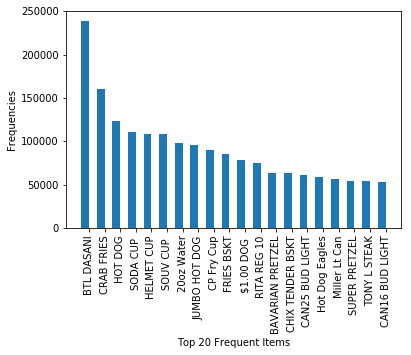

In [143]:
## DO NOT MODIFY
plotTopTwenty(allBaskets)

In [144]:
## TODO
def getRules(freqItemSets, confidence=0.8):
    """Return all association rules with minimum confidence
    
    Return value is a list of pairs, with the first component 
    being a list-valued frequent itemset of the form I-{j} and 
    the second a singleton frequent item j
    
    freqItemSets: dictionary returned by A-Priori algorithm
    confidence: minimum confidence
    """
    n = max(freqItemSets.keys())-1  # last pass of apriori 
    rules = []
    for itemset in freqItemSets[n]:
        # itemset has n items
        for i in range(1,n): # number of items on RHS of a possible rule
            for rhs in combinations(itemset, i):
                lhs = itemset - set(rhs)
                c = freqItemSets[n][itemset]/freqItemSets[len(lhs)][lhs]
                if c >= confidence:
                    rules.append((list(lhs), list(rhs)))
    return rules
                
                
            

In [146]:
## DO NOT MODIFY
for lhs, rhs in getRules(freqsets, confidence=0.5):
    print("{0} -> {1}".format(lhs, rhs))

TypeError: unsupported operand type(s) for -: 'tuple' and 'set'